# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

city_names = []
city_ids = []
countries = []
wind_speeds = []
latitudes = []
longitudes = []
clouds = []
humidities = []
weather_descriptions = []
max_temps = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

720

In [3]:
year = time.localtime()[0]
month = time.localtime()[1]
day = time.localtime()[2]
hour = time.localtime()[3]
minute = time.localtime()[4]

time_now = f"{hour}:{minute}, {month}/{day}/{year}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# test_cities = cities[0:20]

for city in cities:
        response = requests.get(query_url + city).json()
        
        if response["cod"] == 200:
            city_names.append(response["name"])
            city_ids.append(response["id"])
            countries.append(response["sys"]["country"])
            wind_speeds.append(response["wind"]["speed"])
            latitudes.append(response["coord"]["lat"])
            longitudes.append(response["coord"]["lon"])
            clouds.append(response["clouds"]["all"])
            humidities.append(response["main"]["humidity"])
            weather_descriptions.append(response["weather"][0]["description"])
            max_temps.append(response["main"]["temp_max"])

            city_name = city_names[-1]
            city_id = city_ids[-1]
            country = countries[-1]
            rest_message = "Successfully Retrieved"

            message = (f"...... {city_name}, {country} (ID:{city_id}): {rest_message}")
            for m in message:
                if message.index(m) <= 6:
                    sys.stdout.write(m)
                    sys.stdout.flush()
                    time.sleep(0.3)
                else:
                    print(message[7:])
                    time.sleep(0.08)
                    break

print("")
print(f"Weather Data Retrieved for {len(city_names)} Cities - Requested: {time_now}")

...... Saskylakh, RU (ID:2017155): Successfully Retrieved
...... Dikson, RU (ID:1507390): Successfully Retrieved
...... Hobart, AU (ID:2163355): Successfully Retrieved
...... Bethel, US (ID:5880568): Successfully Retrieved
...... Atuona, PF (ID:4020109): Successfully Retrieved
...... Alofi, NU (ID:4036284): Successfully Retrieved
...... Grindavik, IS (ID:3416888): Successfully Retrieved
...... Tuktoyaktuk, CA (ID:6170031): Successfully Retrieved
...... Ancud, CL (ID:3899695): Successfully Retrieved
...... Mazagao, BR (ID:3395042): Successfully Retrieved
...... Busselton, AU (ID:2075265): Successfully Retrieved
...... Vaini, IN (ID:1273574): Successfully Retrieved
...... Butaritari, KI (ID:2110227): Successfully Retrieved
...... Rio Gallegos, AR (ID:3838859): Successfully Retrieved
...... Rikitea, PF (ID:4030556): Successfully Retrieved
...... Jamestown, AU (ID:2069194): Successfully Retrieved
...... Kollam, IN (ID:1259091): Successfully Retrieved
...... Port Alfred, ZA (ID:964432): Suc

...... Jalu, LY (ID:86049): Successfully Retrieved
...... Kahului, US (ID:5847411): Successfully Retrieved
...... Klaksvik, FO (ID:2618795): Successfully Retrieved
...... Cheney, US (ID:5789856): Successfully Retrieved
...... Adet, ET (ID:345353): Successfully Retrieved
...... Puqi, CN (ID:1798473): Successfully Retrieved
...... Beloha, MG (ID:1067565): Successfully Retrieved
...... Puerto del Rosario, ES (ID:2512186): Successfully Retrieved
...... Tautira, PF (ID:4033557): Successfully Retrieved
...... Lakatoro, VU (ID:2136697): Successfully Retrieved
...... Anadyr, RU (ID:2127202): Successfully Retrieved
...... Zachary, US (ID:4346788): Successfully Retrieved
...... Lynchburg, US (ID:4771075): Successfully Retrieved
...... Maragogi, BR (ID:3395458): Successfully Retrieved
...... Nanortalik, GL (ID:3421765): Successfully Retrieved
...... Leningradskiy, RU (ID:2123814): Successfully Retrieved
...... Tiznit, MA (ID:2527089): Successfully Retrieved
...... Ucluelet, CA (ID:6171633): Succe

...... Beba, CU (ID:3543961): Successfully Retrieved
...... Wanning, AT (ID:3220813): Successfully Retrieved
...... Manggar, ID (ID:1636426): Successfully Retrieved
...... Serik, TR (ID:301101): Successfully Retrieved
...... Tres Arroyos, AR (ID:3833859): Successfully Retrieved
...... Rapid Valley, US (ID:5768244): Successfully Retrieved
...... Roald, NO (ID:3141667): Successfully Retrieved
...... Vredendal, ZA (ID:3359736): Successfully Retrieved
...... Ambilobe, MG (ID:1082243): Successfully Retrieved
...... Tibati, CM (ID:2221530): Successfully Retrieved
...... Pochutla, MX (ID:3517970): Successfully Retrieved
...... Isahaya, JP (ID:1861464): Successfully Retrieved
...... Puerto El Triunfo, SV (ID:3584003): Successfully Retrieved
...... Tigil, RU (ID:2120612): Successfully Retrieved
...... Tura, IN (ID:1254046): Successfully Retrieved
...... Channel-Port aux Basques, CA (ID:5919815): Successfully Retrieved
...... Aljezur, PT (ID:2271968): Successfully Retrieved
...... Petrolina, BR 

...... Yetkul, RU (ID:1485849): Successfully Retrieved
...... Kirgiz-Miyaki, RU (ID:548493): Successfully Retrieved
...... Havre-Saint-Pierre, CA (ID:5972291): Successfully Retrieved
...... Abu Samrah, SY (ID:172515): Successfully Retrieved
...... Ferrol, ES (ID:3123493): Successfully Retrieved
...... Astoria, US (ID:5711847): Successfully Retrieved
...... Sal Rei, CV (ID:3374235): Successfully Retrieved
...... Marawi, PH (ID:1701054): Successfully Retrieved
...... Mwense, ZM (ID:902721): Successfully Retrieved
...... Porto Novo, BR (ID:6322184): Successfully Retrieved
...... Hauterive, FR (ID:3013748): Successfully Retrieved
...... Atambua, ID (ID:1651103): Successfully Retrieved
...... San Policarpo, PH (ID:1688696): Successfully Retrieved
...... Upata, VE (ID:3625710): Successfully Retrieved
...... Saint-Leu, RE (ID:6690297): Successfully Retrieved
...... Barra do Garcas, BR (ID:3470709): Successfully Retrieved
...... Cabo San Lucas, MX (ID:3985710): Successfully Retrieved
...... Sa

...... Kipini, KE (ID:191675): Successfully Retrieved
...... Sept-Iles, CA (ID:6144312): Successfully Retrieved
...... Kalmunai, LK (ID:1242110): Successfully Retrieved
...... Alekseyevsk, RU (ID:2022083): Successfully Retrieved
...... Palmer, US (ID:5871146): Successfully Retrieved
...... Anjangaon, IN (ID:1278580): Successfully Retrieved
...... Richards Bay, ZA (ID:962367): Successfully Retrieved
...... Barmer, IN (ID:1276901): Successfully Retrieved
...... Huanren, CN (ID:2036713): Successfully Retrieved
...... Horqueta, PY (ID:3480780): Successfully Retrieved
...... Ferkessedougou, CI (ID:2289049): Successfully Retrieved
...... Loanda, BR (ID:3458479): Successfully Retrieved
...... Mayya, RU (ID:2020121): Successfully Retrieved
...... Beni Mazar, EG (ID:359212): Successfully Retrieved
...... Muroto, JP (ID:1856392): Successfully Retrieved
...... Luena, AO (ID:3347719): Successfully Retrieved
...... Abalak, NE (ID:2448245): Successfully Retrieved
...... Merauke, ID (ID:2082539): Suc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
combined_dictionary = {
    "City":city_names,
    "ID":city_ids,
    "Wind Speed":wind_speeds,
    "Latitude":latitudes,
    "Longitude":longitudes,
    "Cloudiness":clouds,
    "Humidity":humidities,
    "Weather Description":weather_descriptions,
    "Max Temperature":max_temps
}

combined_weather_df = pd.DataFrame(combined_dictionary)

combined_weather_df.to_csv("Open Weather DataFrame.csv", encoding="utf-8", index=False, header=True)

# save to csv
combined_weather_df.head()

,City,ID,Wind Speed,Latitude,Longitude,Cloudiness,Humidity,Weather Description,Max Temperature
0,Saskylakh,2017155,3.94,71.97,114.09,76,69,broken clouds,11.46
1,Dikson,1507390,25.52,73.51,80.55,88,93,overcast clouds,28.56
2,Hobart,2163355,9.17,-42.88,147.33,0,66,clear sky,57.00
3,Bethel,5880568,19.46,60.79,-161.76,75,86,broken clouds,39.20
4,Atuona,4020109,13.11,-9.80,-139.03,44,100,scattered clouds,82.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

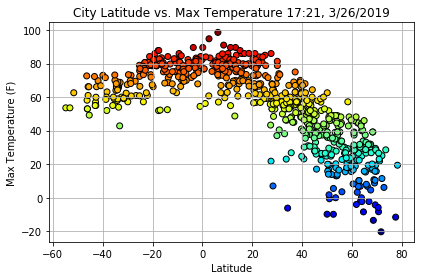

In [6]:
cmap = matplotlib.cm.get_cmap("jet")
normalize = matplotlib.colors.Normalize(vmin=min(max_temps), vmax=max(max_temps))
colors = [cmap(normalize(value)) for value in max_temps]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Max Temperature"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

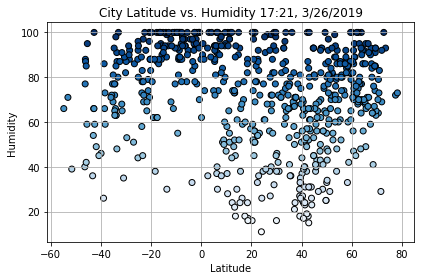

In [7]:
cmap = matplotlib.cm.get_cmap("Blues")
normalize = matplotlib.colors.Normalize(vmin=min(humidities), vmax=max(humidities))
colors = [cmap(normalize(value)) for value in humidities]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Humidity"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Humidity {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

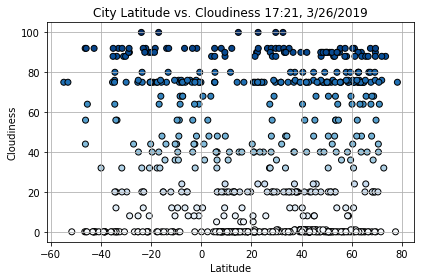

In [8]:
cmap = matplotlib.cm.get_cmap("Blues")
normalize = matplotlib.colors.Normalize(vmin=min(clouds), vmax=max(clouds))
colors = [cmap(normalize(value)) for value in clouds]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Cloudiness"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

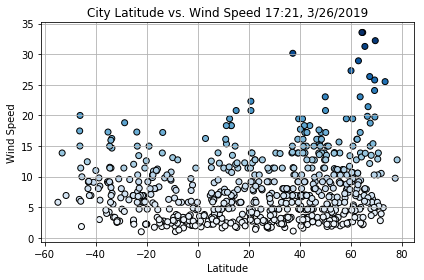

In [9]:
cmap = matplotlib.cm.get_cmap("Blues")
normalize = matplotlib.colors.Normalize(vmin=min(wind_speeds), vmax=max(wind_speeds))
colors = [cmap(normalize(value)) for value in wind_speeds]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Wind Speed"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()